# Alexander Nel Interpretable Machine Learning.

  Using Breast Cancer Diagnostic Data.

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset from Sklearn
from sklearn.datasets import load_breast_cancer

Data = load_breast_cancer()


In [2]:
# Examine the names of the features in the dataset
print(Data.feature_names)

# Get the first 10 feature names into an array called Feature_Names and verify that they are correctly assigned
Feature_Names = Data.feature_names[0:10]
print(Feature_Names)

# Examine the target names of the targets in the dataset
print(Data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension']
['malignant' 'benign']


In [3]:
# Get a description of the data
print(Data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## As can be seen from the description, there are no missing entries in this data set.
## Additionally note that the data was taken from Masses in the Breasts of individuals note that masses is often synonymous with tumors or lumps.
## I refer to masses as tumors in my later post-hoc analysis of the data.

In [4]:
# Create a single DataFrame with the class (Malignent (0) or Benign (1)) as well as the first ten features
Df_target = pd.DataFrame(Data.target,columns = ["Class"])
Df_data = pd.DataFrame(Data.data[:,:10],columns= Data.feature_names[:10])
Df_Data_Compiled = pd.concat([Df_target,Df_data],axis =1)

# Create a Version with 0 and 1 replaced with Malignent and Benign respectively, for the purpose of understanding.
Df_Data_U = Df_Data_Compiled.copy()
Df_Data_U["Class"].replace(0,"Malignent",inplace = True)
Df_Data_U["Class"].replace(1,"Benign", inplace = True)
Df_Data_U

,Class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,Malignent,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,Malignent,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,Malignent,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,Malignent,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,Malignent,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,Malignent,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,Malignent,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,Malignent,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,Malignent,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [5]:
# Verify that there are indeed 212 Malignent entries in the Data Frame
Df_Data_U[Df_Data_U['Class'] == "Malignent"].shape

(212, 11)

In [6]:
# Verify that there are indeed 357 Benign entries in the Data Frame
Df_Data_U[Df_Data_U['Class'] == "Benign"].shape

(357, 11)

# Split the data into training and testing sets with 20% of the data used for testing.

In [7]:
np.random.seed(3035394254)
X, y = Data.data, Data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)


In [8]:
np.random.seed(3035394254)
df_train,df_test = train_test_split(Df_Data_Compiled,test_size = 0.2)

In [9]:
df_train

,Class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
352,0,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,0.06121
42,0,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343
527,1,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808
418,1,12.70,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275
91,0,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097
...,...,...,...,...,...,...,...,...,...,...,...
438,1,13.85,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673
107,1,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066
127,0,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044
324,1,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,0.06129


In [10]:
df_test

,Class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
468,0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.213600,0.10020,0.1696,0.07369
251,1,11.500,18.45,73.28,407.4,0.09345,0.05991,0.026380,0.02069,0.1834,0.05934
562,0,15.220,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,0.2128,0.07152
424,1,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.01967,0.2538,0.07029
444,0,18.030,16.85,117.50,990.0,0.08947,0.12320,0.109000,0.06254,0.1720,0.05780
...,...,...,...,...,...,...,...,...,...,...,...
421,1,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.06300,0.2086,0.07406
41,0,10.950,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.05669,0.1895,0.06870
17,0,16.130,20.68,108.10,798.8,0.11700,0.20220,0.172200,0.10280,0.2164,0.07356
18,0,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.09498,0.1582,0.05395


In [11]:
# Readjust the X_train and X_test so that they contain only the first ten features
X_train = X_train[:,0:10]
X_test = X_test[:,0:10]

# Verify that the shapes of X_train and X_test are correct, they should both have 10 collumns
print(X_train.shape)
print(X_test.shape)

(455, 10)
(114, 10)


# Fit a decision tree classifier using the first 10 Features and a max-depth of 3.

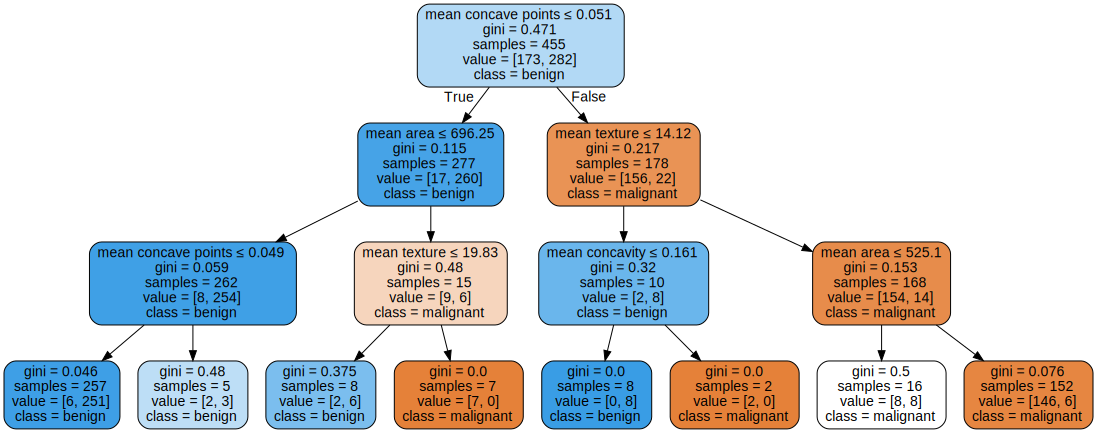

In [12]:
Dt_Clf = DecisionTreeClassifier(max_depth=3)
Dt_Clf.fit(X_train, y_train)

# Visualizing tree by making use of graphviz
import graphviz
from sklearn import tree
from IPython.display import display
from IPython.display import SVG
from graphviz import Source

Dot_Data = tree.export_graphviz(Dt_Clf,out_file= None, feature_names= Feature_Names,class_names= Data.target_names,filled=True,rounded=True,special_characters=True)
display(graphviz.Source(Dot_Data))



## Print the accuracy score for the training data set


In [13]:
print('Accuracy on the training set using Decision Tree:', accuracy_score( y_train, Dt_Clf.predict(X_train)))

Accuracy on the training set using Decision Tree: 0.9472527472527472


# Fit a Random forest and Gradient Boosting Machine.

## Fitting the Random Forest Classifier.

In [14]:
# Import the RandomForest Classifier form sklearn
from sklearn.ensemble import RandomForestClassifier

# Fit the random forest classifier
Rf_Clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
Rf_Clf.fit(X_train, y_train)

# Print the accuracy score for the training data set
print('Accuracy on the training set using Random Forest:', accuracy_score( y_train, Rf_Clf.predict(X_train)))
auc_train_rf = roc_auc_score(y_train,Rf_Clf.predict_proba(X_train)[:,1])
print('AUC on training data using Random Forest:',auc_train_rf)
print('OOB Accuracy:', Rf_Clf.oob_score_.round(4))

Accuracy on the training set using Random Forest: 1.0
AUC on training data using Random Forest: 1.0
OOB Accuracy: 0.9341


## Fit the Gradient Boosting Machine.

In [15]:
# Import the Xgboost package
import xgboost as xgb

# Fit the Xgboost model
Xgb_Clf = xgb.XGBClassifier()
Xgb_Clf.fit(X_train,y_train)


auc_train = roc_auc_score(y_train,Xgb_Clf.predict_proba(X_train)[:,1])
print('AUC on training data using Xgboost:',auc_train)

AUC on training data using Xgboost: 0.9999795023162382


### For the sake of interest display the Feature Importance of the first ten features.


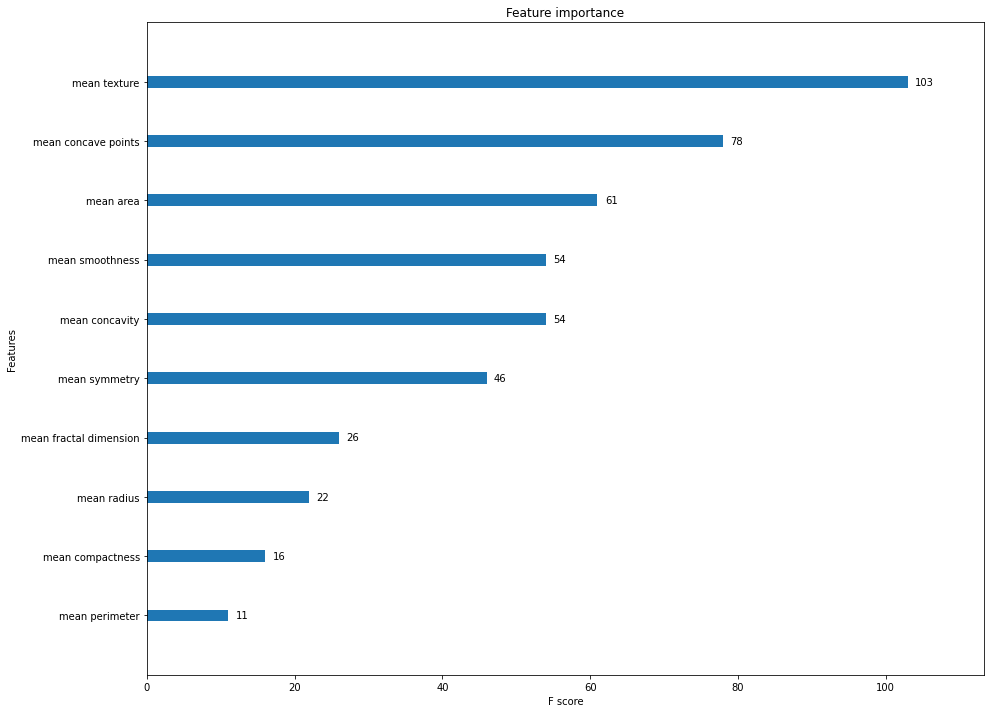

In [16]:
Xgb_Clf.get_booster().feature_names = list(Data.feature_names)
plt.figure(figsize=(15,12))
ax = plt.gca()
xgb.plot_importance(Xgb_Clf,grid=False,ax=ax)
plt.show()

# Fit support vector classifiers with Linear and RBF kernels respectively.

## Fit a Linear SVC without RBF kernels.

In [17]:
# Import the Linear SVC
from sklearn.svm import LinearSVC

# Fit the Linear SVC
LinSVC = LinearSVC(max_iter=1e5)
LinSVC.fit(X_train,y_train)

# Show the accuracy of the Linear SVC
print('Accuracy on the training data using Linear SVC:',accuracy_score(y_train,LinSVC.predict(X_train)))

Accuracy on the training data using Linear SVC: 0.7054945054945055


## Fit and display the accuracy of a SVC with RBF kernels.

In [18]:
# Import the SVC
from sklearn.svm import SVC

# Fit the  SVC with a RBF kernel
RbfSVC = SVC(gamma='auto')
RbfSVC.fit(X_train,y_train)

# Show the accuracy of the SVC with RBF kernel
print('Accuracy on the training data using SVC with RBF kernel:',accuracy_score(y_train,RbfSVC.predict(X_train)))

Accuracy on the training data using SVC with RBF kernel: 0.9868131868131869


## Conclusions among SVC:
### As can be seen among the Support Vector Classifiers, the SVC with the RBF Kernel has the highest accuracy score on the training data.

# Fit a MLP classifier

In [19]:
# Import the MLP classifier
from sklearn.neural_network import MLPClassifier

# Fit the MLP classifier
MLP_Clf = MLPClassifier(hidden_layer_sizes = [10], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, verbose = False, random_state=3035394254)
MLP_Clf.fit(X_train,y_train)

# Show the accuracy of the MLP
print('Accuracy on the training data using MLP:',accuracy_score(y_train,MLP_Clf.predict(X_train)))


Accuracy on the training data using MLP: 0.8417582417582418


# Pick the best model and run post hoc analysis on it


## Step 1 Identify the accuracies on the testing data of all the above models

In [20]:
# Decision tree accuracy on testing data
Dt_Clf.fit(X_test, y_test)
print('Accuracy on the testing data set using Decision Tree:', accuracy_score(y_test, Dt_Clf.predict(X_test)))

# Random forest accuracy on testing data
Rf_Clf.fit(X_test, y_test)
print('Accuracy on the testing data set using Random Forest:', accuracy_score(y_test, Rf_Clf.predict(X_test)))

# Xgboost model accuracy on testing data
Xgb_Clf.fit(X_test, y_test)
auc_test = roc_auc_score(y_test,Xgb_Clf.predict_proba(X_test)[:,1])
print('Accuracy on testing data using Xgboost:',auc_test)

# Linear SVC accuracy on the testing data
LinSVC.fit(X_test, y_test)
print('Accuracy on the testing data using Linear SVC:',accuracy_score(y_test,LinSVC.predict(X_test)))

# SVC with RBF Kernel accuracy on testing data set
RbfSVC.fit(X_test, y_test)
print('Accuracy on the testing data using SVC with RBF kernel:',accuracy_score(y_test,RbfSVC.predict(X_test)))

# MLP accuracy on the testing data
MLP_Clf.fit(X_test, y_test)
print('Accuracy on the testing data using MLP:',accuracy_score(y_test,MLP_Clf.predict(X_test)))


Accuracy on the testing data set using Decision Tree: 0.9912280701754386
Accuracy on the testing data set using Random Forest: 1.0
Accuracy on testing data using Xgboost: 1.0
Accuracy on the testing data using Linear SVC: 0.9035087719298246
Accuracy on the testing data using SVC with RBF kernel: 1.0
Accuracy on the testing data using MLP: 0.8508771929824561


### Create a dataframe of the methods and their accuracies on the test data and sort them in descending order.

In [21]:
Acc_On_Test = [["Decision Tree",accuracy_score(y_test, Dt_Clf.predict(X_test))],["Random Forest",accuracy_score(y_test, Rf_Clf.predict(X_test))],["Xgboost",auc_test],["Linear SVC",accuracy_score(y_test,LinSVC.predict(X_test))],["SVC with RBF",accuracy_score(y_test,RbfSVC.predict(X_test))],["MLP",accuracy_score(y_test,MLP_Clf.predict(X_test))]]
Acc_test_DF = pd.DataFrame(Acc_On_Test,columns=['Method', 'Acc on test'])
Acc_test_DF.sort_values(by = ["Acc on test"], ascending = False,inplace = True)
Acc_test_DF

,Method,Acc on test
1,Random Forest,1.000000
2,Xgboost,1.000000
4,SVC with RBF,1.000000
0,Decision Tree,0.991228
3,Linear SVC,0.903509
5,MLP,0.850877


## As can be seen from the above DataFrame Random Forest, Xgboost and SVC with RBF Kernels had the highest accuracies on the testing data set.
## These 3 are in top place and their accuracies on the training data set are also 1.
## Due to these reasons I select XGBoost as the model I wish to use to carry out the post-hoc analysis on.

## Post-Hoc analysis

### Variable Importance

In [22]:
# Please uncomment if you have not yet installed eli5.
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

# define a permutation importance object
perm = PermutationImportance(Xgb_Clf).fit(X_train, y_train)
# show the importance
eli5.show_weights(perm, feature_names=Feature_Names)


Using TensorFlow backend.


Weight,Feature
0.0725 ± 0.0171,mean area
0.0365 ± 0.0168,mean concavity
0.0198 ± 0.0152,mean texture
0.0105 ± 0.0094,mean concave points
0 ± 0.0000,mean compactness
0 ± 0.0000,mean perimeter
-0.0004 ± 0.0033,mean smoothness
-0.0018 ± 0.0018,mean fractal dimension
-0.0040 ± 0.0018,mean symmetry
-0.0066 ± 0.0039,mean radius


### Variable importance in decreasing order within the training data

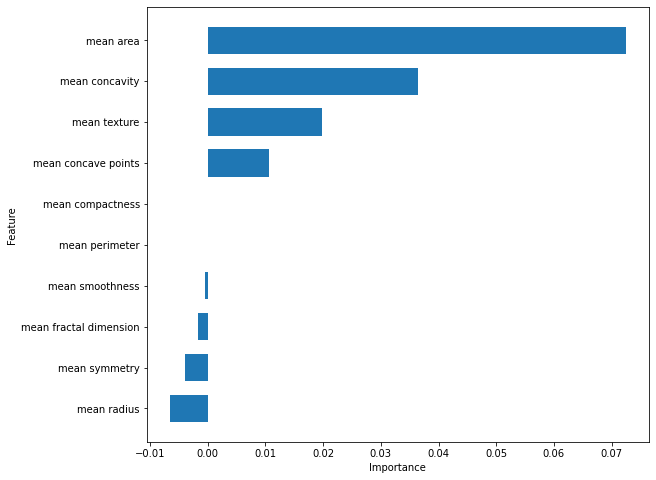

In [23]:
imp_ord = np.argsort(perm.feature_importances_)

plt.figure(figsize=(9,8))
yaxis = np.arange(len(perm.feature_importances_))*1.2
plt.barh(y = yaxis,width = perm.feature_importances_[imp_ord])
plt.yticks(yaxis,Data.feature_names[imp_ord])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

### Among the features in the training data set, we can clearly see that mean area,concavity,texture and concave points are the top 4
### features in terms of importance with regards to explaining the status of the subjects' breasts tumors (Malignent or Benign).
### The mean area is clearly the dominant feature in explaining whether or not a patient will have a malignent tumor in their breast or not.

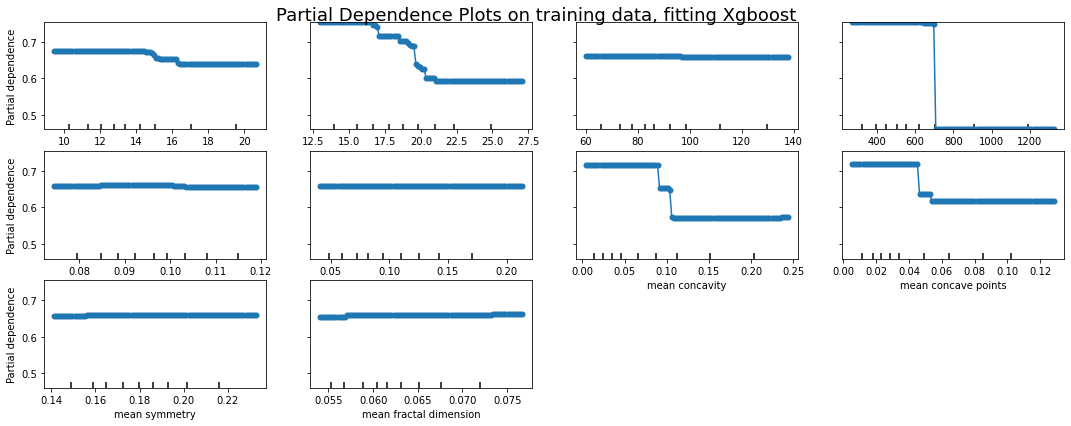

In [24]:
# Partial Dependence Plots
from sklearn.inspection import plot_partial_dependence as pdp
n_cols = 4
n_rows = Feature_Names.shape[0]//n_cols + 1

fig = plt.figure(figsize=(15, 2*n_rows))
pdp(Xgb_Clf, X_train, features=Feature_Names, feature_names= Feature_Names,
    n_cols=n_cols, fig=fig, line_kw={'marker': 'o', 'markeredgecolor': 'None'})

plt.suptitle('Partial Dependence Plots on training data, fitting Xgboost', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# In general the trends observed from the Partial dependence plots is that the greater the features values for mean(Radius,Texture,Area,Concavity,Concave Points),
# the lower the partial dependence.
# However as can be observed for symmetry smoothness and fractal dimensio there seems to be regions wihtin which the partial dependence can increase and then decrease.

In [25]:
!pip install pycebox
import pycebox.ice as icebox
from pycebox.ice import ice, ice_plot
feature_names = df_train.columns[1:].values

# monkey patch a typo in `pycebox` which calls __get_quantiles instead of _get_quantiles


def __get_quantiles(x):
    return np.greater.outer(x, x).sum(axis=1) / x.size


icebox.__get_quantiles = __get_quantiles

# define a function to get predicted probability for benign for the ICE plots.
def pred_fun(X_train):
    return Xgb_Clf.predict_proba(X_train)[:, 1]

df_X_train = df_train.iloc[:,1:]
df_X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
352,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,0.06121
42,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808
418,12.70,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097
...,...,...,...,...,...,...,...,...,...,...
438,13.85,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066
127,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044
324,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,0.06129


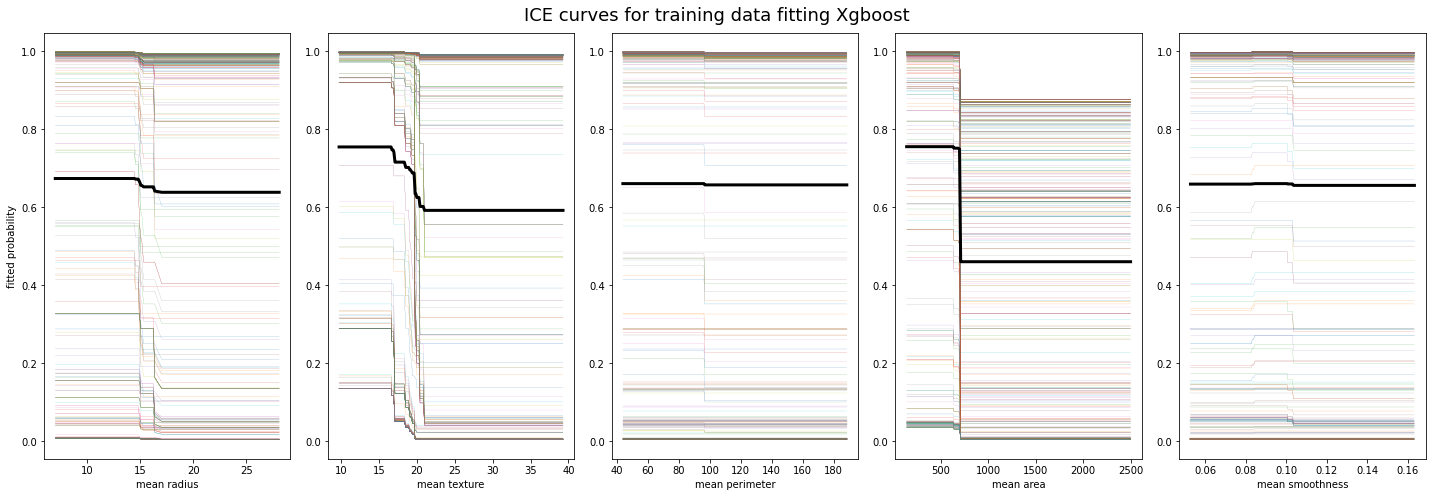

In [26]:
# Fig1: uncentered ICE plots on the training data set
fig, axes = plt.subplots(1, 5, figsize=(20, 7))

# plot the first 5 features
for i, feature_name in enumerate(feature_names[:5]):
    # generate ICE data points
    ice_df = icebox.ice(df_X_train, column=feature_name,
                        predict=pred_fun, num_grid_points=100)

    # plot
    plt.subplot(axes[i])
    icebox.ice_plot(ice_df, linewidth=0.15, plot_pdp=True,
                    pdp_kwargs={'c': 'k', 'linewidth': 3}, ax=axes[i])
    axes[i].set_xlabel(feature_name)

axes[0].set_ylabel('fitted probability')
plt.suptitle('ICE curves for training data fitting Xgboost', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])

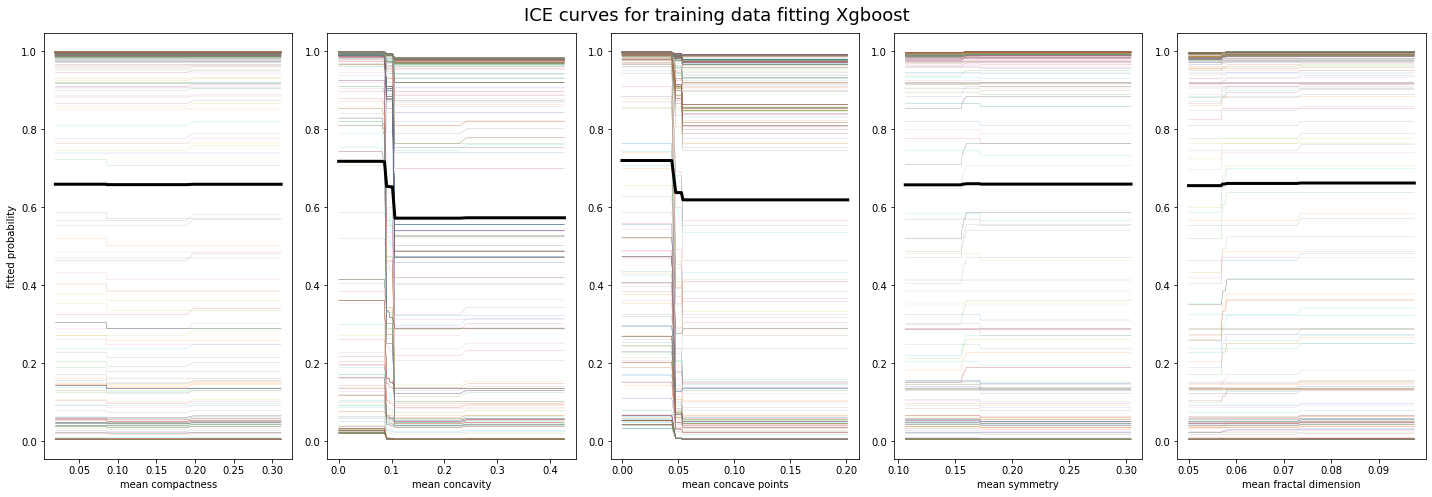

In [27]:
# Fig2: uncentered ICE plots of last five features in training data set
fig, axes = plt.subplots(1, 5, figsize=(20, 7))

# plot the last 5 features
for i, feature_name in enumerate(feature_names[5:]):
    # generate ICE data points
    ice_df = icebox.ice(df_X_train, column=feature_name,
                        predict=pred_fun, num_grid_points=100)

    # plot the ICE plots
    plt.subplot(axes[i])
    icebox.ice_plot(ice_df, linewidth=0.15, plot_pdp=True,
                    pdp_kwargs={'c': 'k', 'linewidth': 3}, ax=axes[i])
    axes[i].set_xlabel(feature_name)

axes[0].set_ylabel('fitted probability')
plt.suptitle('ICE curves for training data fitting Xgboost', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])

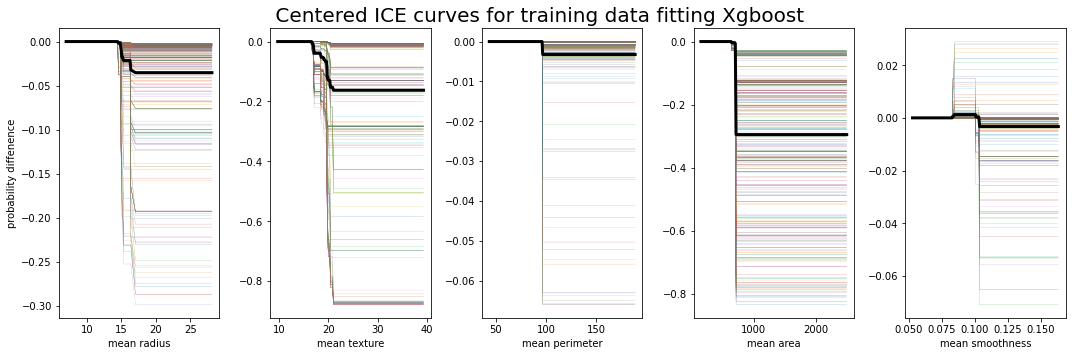

In [28]:
# Fig3: centered ICE plots on the Training data, utilizing Xgboost
fig, axes = plt.subplots(1,5,figsize=(15, 5))

# plot the first 5 features
for i, feature_name in enumerate(feature_names[:5]):
    plt.subplot(axes[i])
    ice_df = icebox.ice(df_X_train, column=feature_name,
                        predict=pred_fun, num_grid_points=100)
    icebox.ice_plot(ice_df, linewidth=0.15, plot_pdp=True,
                    pdp_kwargs={'c': 'k', 'linewidth': 3}, centered=True, ax=axes[i])
    axes[i].set_xlabel(feature_name)

axes[0].set_ylabel('probability diffenence')
plt.suptitle(' Centered ICE curves for training data fitting Xgboost', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

### **Conclusion from ICE plots:** 
### Among the first 4 features we can clearly see that the Probability difference is negative in general for the the majority of cases.
### This indicates that among these 4 variables, the greater the value of these features, the lower the value of the class (Signifying a greater probability of the mass or tumor being malignent)

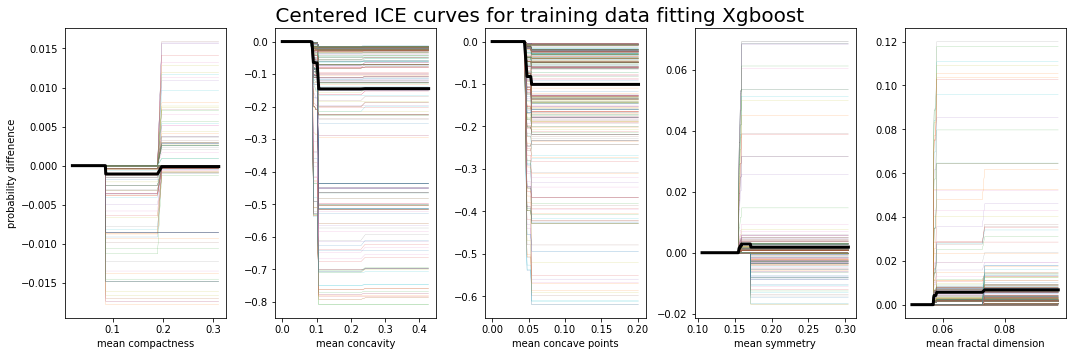

In [29]:
# Fig4: centered ICE plots on the Training data, utilizing Xgboost
fig, axes = plt.subplots(1,5,figsize=(15, 5))

# plot the last 5 features
for i, feature_name in enumerate(feature_names[5:]):
    plt.subplot(axes[i])
    ice_df = icebox.ice(df_X_train, column=feature_name,
                        predict=pred_fun, num_grid_points=100)
    icebox.ice_plot(ice_df, linewidth=0.15, plot_pdp=True,
                    pdp_kwargs={'c': 'k', 'linewidth': 3}, centered=True, ax=axes[i])
    axes[i].set_xlabel(feature_name)

axes[0].set_ylabel('probability diffenence')
plt.suptitle(' Centered ICE curves for training data fitting Xgboost', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

### Mean concavity and concave points appear to have more negative probability differences values the greater their feature values are. This indicates that in general the greater concavity or concave points (mean),
### the more likely it is that the tumor or mass would be malignent. We also see that these two among the last five have the greatest magnitudes in impact on probability differnce.
### Mean symmetry and fractal dimension appear to have a slight positive probability differnce impact in general and one that increases as their feature values increases, this suggest that the more symmetric or the greater the fractal dimension of the masses in the breasts the more likely the mass is to be benign.

## **Using Shap package:**
## Use Shapley Values to visualize and understand the importance of the features in the training data and how they impact the dependent variable (Malignent or Benign)

In [30]:
!pip install shap
import shap


# load JS visualization code
shap.initjs()

# kernel explainer is slow so we use shap.kmeans(data,K) to accelerate its evaluation
# explainer should be defined on the training set
explainer = shap.KernelExplainer(Xgb_Clf.predict_proba, shap.kmeans(X_train, 10))


# explain on the training data set 
shap_values = explainer.shap_values(X_train)

In [31]:
# '1' in explainer.expected_value[1]: we consider the feature effects of P(Y=1)
# shap_values[1][i]: extract the shape value of the ith sample that correponds to P(Y=1)
# X_train[i]: the ith sample in training set
# Visualize the impact of the independent variables on the dependent(0 = Malignent, 1 = Benign)
shap.initjs()
i = 1
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1][i],
                features=X_train[i], feature_names=Feature_Names)

### As can be seen from the above shapley value force plot, the 5 features that are driving the base value down to the the output value for the first sample
### are the mean area, mean texture, mean concavitity, mean concave points and the mean radius. With the mean area and mean texture having the greatest impacts on the output value
### Note that the output value is 0 this means that this particular individual's tumor was Malignent (Harmful) .

In [32]:
# Examine the force plot for the second sample (which is a Benign Tumor as its class or output value is 1)
shap.initjs()
i = 2
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1][i],
                features=X_train[i], feature_names=Feature_Names)

### In this second sample above, we can see that mean area, mean texture and mean concavitity again played the greatest role (top 3) features,
### in "forcing" the output from the base value to 1 (Benign tumor meaning it is a harmless tumor in the breast).

In [34]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1],
                X_train[:], feature_names=Feature_Names)

## Generate a Bar Chart of the average values of the Shapley values of the features so that we can visualize and examine the average impact of the features
## From the below summary plot we see that area,texture concavity, concave points and radius (all means) were the most important variables in determining whether or not an individual had malignent or benign tumors in their breasts.

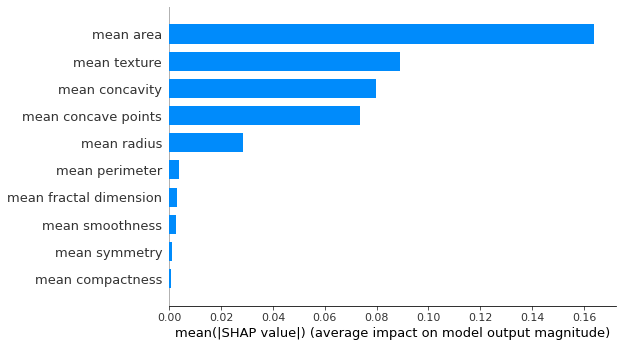

In [35]:
shap.summary_plot(shap_values[1], feature_names=Feature_Names, plot_type='bar')

## The below summary plot allows us to examine the relationship between Shapley Values, Feature Values and ultimately how that impacts whether the tumors in the individual's breasts are Malignent (0) or Benign (1)

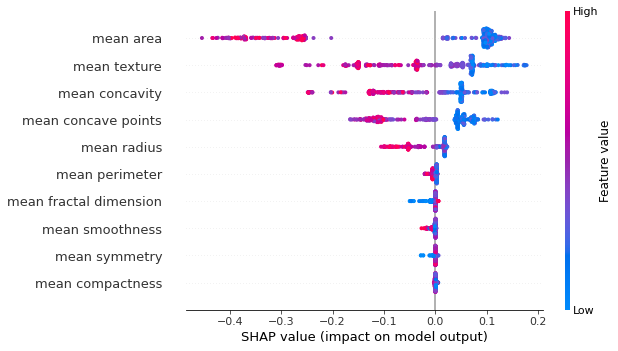

In [36]:
shap.summary_plot(shap_values[1], X_train[:],
                  feature_names=Feature_Names)

# **Final Conclusions:**
# What can be seen from the above diagram is that mean- area, texture, concavity, concave points and radius all have signifivant impacts on whether or not tumors will be benign or malignent.
# What can be seen from mean area in general is that the greater the feature value (red dots) the lower the shapley values were. This intuitively makes sense as larger tumors would more likely be harmful or Malignent.Whilst smaller ones are expected to be Benign (harmless).
# From texture we concluded similarly that the greater this feature's values, the more likely the tumors were to be malignent as the shapley values are more likely to be negative for for higher values of mean texture.
# Mean Concavity and concave points also follow a similar trend in that greater feature values for both lead to lower shapley values in general, implying that the tumors in the breast are more likely to be harmful (malignent)
# The last feature I would like to comment on is the mean radius as can be seen there is a clear decrease in shapley values for higher feature values (greater mean radius of tumor) thus the greater the mean radius on average the greater the likelihood that the tumor is Malignent.
